In [4]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


from sklearn.model_selection import KFold,LeaveOneOut, cross_val_score


from sklearn.preprocessing import StandardScaler

from tqdm import tqdm

pd.options.display.float_format = "{:,.2f}".format
import sys
sys.path.append("../")
# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')


In [12]:
df = pd.read_csv("../data/autorenew_clean_estandar_sin_out_enc.csv", index_col = 0).reset_index(drop = True)

In [13]:
df = df.drop(["name","dateCreated","lastSeen"], axis = 1)
df.head()

,seller,offerType,abtest,vehicleType,gearbox,model,fuelType,brand,notRepairedDamage,price_knn,monthOfRegistration_knn,postalCode_knn,powerCV_estandar,kilometer_estandar,yearOfRegistration_estandar
0,"10,690.28","10,690.43","10,881.72","11,782.79","7,912.58","19,432.72","8,753.18","14,478.71","20,760.72","2,990.00",6.00,"49,733.00",-0.05,0.61,-0.02
1,"10,690.28","10,690.43","10,881.72","24,522.52","7,912.58","22,216.94","10,392.23","12,732.91","6,147.93","18,300.00",5.00,"66,954.00",0.39,-0.02,0.07
2,"10,690.28","10,690.43","10,881.72","13,006.87","13,095.47","9,876.84","10,392.23","11,828.02","20,760.72","9,800.00",8.00,"90,480.00",0.25,-0.02,-0.01
3,"10,690.28","10,690.43","10,881.72","5,558.22","7,912.58","19,432.72","8,753.18","14,478.71","8,559.12","1,500.00",6.00,"91,074.00",-0.21,0.61,-0.04
4,"10,690.28","10,690.43","10,881.72","5,558.22","7,912.58","4,127.68","10,392.23","6,310.38","8,559.12","3,600.00",7.00,"60,437.00",-0.24,-0.89,0.04


In [14]:
df['price_knn'] = df['price_knn'].astype("O")

In [22]:
df.dtypes

seller                         float64
offerType                      float64
abtest                         float64
vehicleType                    float64
gearbox                        float64
model                          float64
fuelType                       float64
brand                          float64
notRepairedDamage              float64
price_knn                      float64
monthOfRegistration_knn        float64
postalCode_knn                 float64
powerCV_estandar               float64
kilometer_estandar             float64
yearOfRegistration_estandar    float64
dtype: object

# Preprocesamiento

In [15]:
escalador_stand = StandardScaler()
datos_transf_stand = escalador_stand.fit_transform(df.select_dtypes(include = np.number))
df[df.select_dtypes(include = np.number).columns] = datos_transf_stand
df.head()

,seller,offerType,abtest,vehicleType,gearbox,model,fuelType,brand,notRepairedDamage,price_knn,monthOfRegistration_knn,postalCode_knn,powerCV_estandar,kilometer_estandar,yearOfRegistration_estandar
0,0.00,0.01,0.96,0.22,-0.39,0.89,-0.40,0.43,2.02,"2,990.00",0.07,-0.05,-0.06,0.59,-0.02
1,0.00,0.01,0.96,2.74,-0.39,1.17,-0.06,0.23,-0.91,"18,300.00",-0.21,0.64,0.45,-0.04,0.10
2,0.00,0.01,0.96,0.46,0.34,-0.08,-0.06,0.13,2.02,"9,800.00",0.62,1.57,0.29,-0.04,-0.00
3,0.00,0.01,0.96,-1.02,-0.39,0.89,-0.40,0.43,-0.43,"1,500.00",0.07,1.59,-0.24,0.59,-0.04
4,0.00,0.01,0.96,-1.02,-0.39,-0.67,-0.06,-0.49,-0.43,"3,600.00",0.35,0.38,-0.28,-0.93,0.06


In [16]:
df['price_knn'] = df['price_knn'].astype(float)

# Modelo

In [17]:
X = df.drop(["price_knn"], axis = 1)
y = df[["price_knn"]]

X_train, X_test, y_train,y_test = train_test_split(X,y, train_size=0.8, random_state=42, shuffle=True)

In [18]:
modelo_lineal = LinearRegression()
modelo_lineal.fit(X_train, y_train)
y_pred_test = modelo_lineal.predict(X_test)
y_pred_train = modelo_lineal.predict(X_train)

In [20]:
metricas = {
    'train': {
        'r2': r2_score(y_train, y_pred_train),
        'MAE': mean_absolute_error(y_train, y_pred_train),
        'MSE': mean_squared_error(y_train, y_pred_train),
        'RMSE': np.sqrt(mean_squared_error(y_train, y_pred_train))
    },
    'test': {
        'r2': r2_score(y_test, y_pred_test),
        'MAE': mean_absolute_error(y_test, y_pred_test),
        'MSE': mean_squared_error(y_test, y_pred_test),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_test))

    }
}

df_metricas_lineal = pd.DataFrame(metricas).T
df_metricas_lineal

,r2,MAE,MSE,RMSE
train,0.00,"17,681.56","514,507,841,246.39","717,292.02"
test,-0.03,"12,441.79","7,580,873,215.96","87,068.21"


In [23]:
# Configurar K-Fold Cross-Validation
kf = KFold(n_splits=5, 
           shuffle=True,
            random_state=42)

# Calcular los puntajes de cross-validation
scores_r2 = cross_val_score(modelo_lineal, X, y, cv=kf, scoring='r2') 
scores_rmse = abs(cross_val_score(modelo_lineal, 
                                  X, 
                                  y, 
                                  cv=kf, 
                                  scoring='neg_root_mean_squared_error') )
print(scores_r2)
print(scores_rmse)

[-2.69547158e-02 -1.05947979e-02  3.64173952e-04  9.02931943e-05
  4.38421007e-04]
[ 87068.21013413 111342.11320372 640384.81327393 903266.03608185
 905722.12282351]


In [ ]:
# loo = LeaveOneOut()

# # Calcular los puntajes usando LOOCV (RMSE como métrica)
# scores = []
# for train_index, test_index in tqdm(loo.split(X)):
#     # Dividir los datos en train y test
#     X_train_cv, X_test_cv = X.iloc[train_index, :], X.iloc[test_index, :]
#     y_train_cv, y_test_cv = y.iloc[train_index,:], y.iloc[test_index, :]
    
#     # Entrenar el modelo
#     modelo_lineal.fit(X_train_cv, y_train_cv)
    
#     # Hacer predicciones
#     y_pred = modelo_lineal.predict(X_test_cv)
    
#     # Calcular el RMSE para la iteración actual
#     rmse = np.sqrt(mean_squared_error(y_test_cv, y_pred))
#     scores.append(rmse)

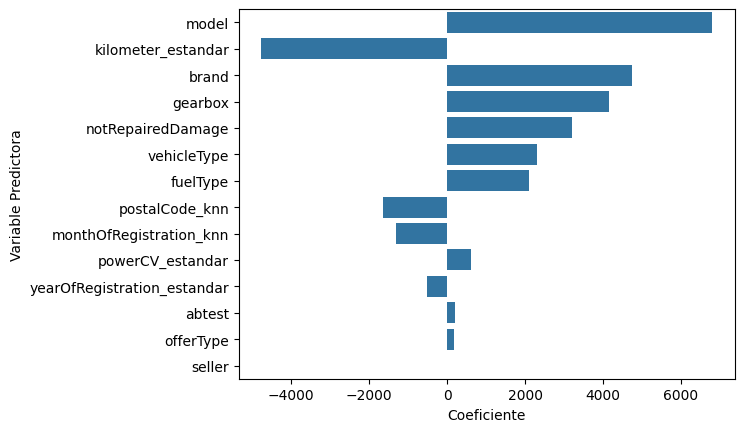

In [25]:
coeficientes = modelo_lineal.coef_[0]

importance_df = pd.DataFrame({
    'Variable Predictora': X.columns,
    'Coeficiente': coeficientes
    }).sort_values(by='Coeficiente', key=abs, ascending=False)

sns.barplot(y = "Variable Predictora", x = "Coeficiente", data = importance_df);

Profundidad del árbol: 3
Número de nodos terminales: 8


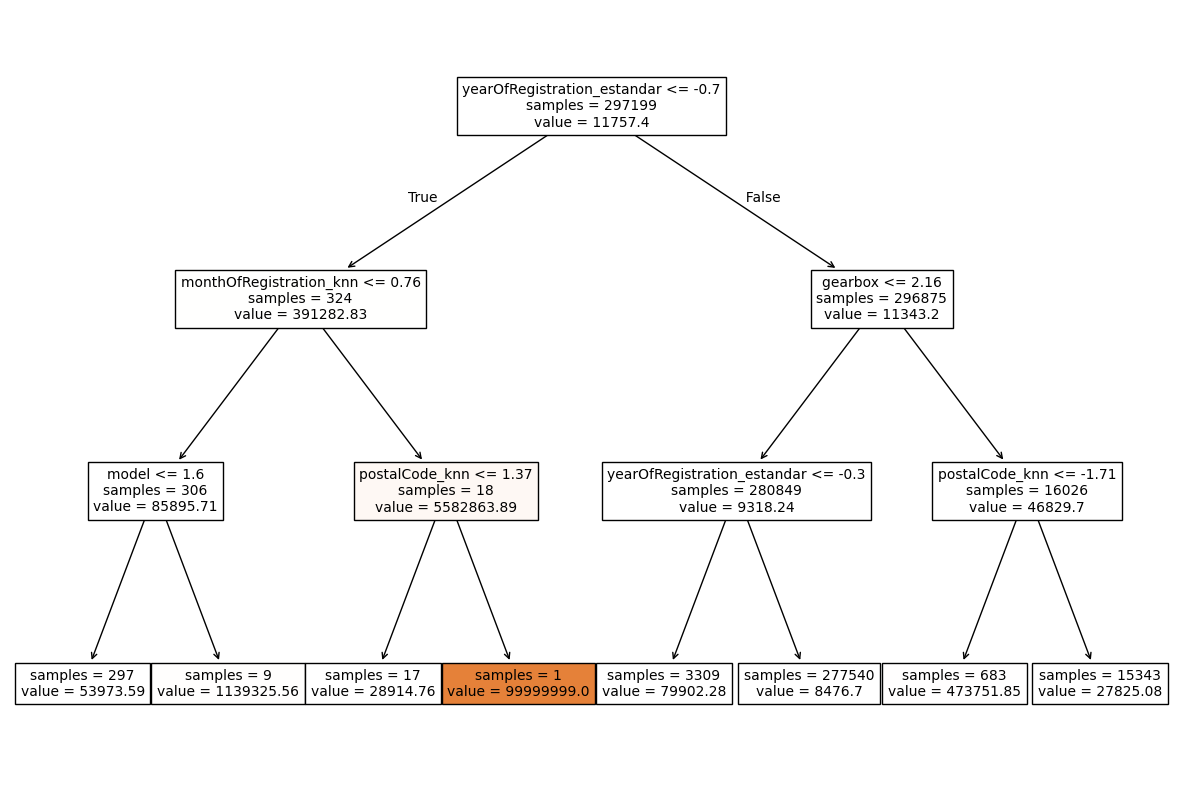

In [26]:
# Creación del modelo
# ------------------------------------------------------------------------------
modelo_arbol = DecisionTreeRegressor(
            max_depth         = 3,
            random_state      = 123
          )

# Entrenamiento del modelo
# ------------------------------------------------------------------------------
modelo_arbol.fit(X_train, y_train)
# Estructura del árbol creado
# ------------------------------------------------------------------------------

print(f"Profundidad del árbol: {modelo_arbol.get_depth()}")
print(f"Número de nodos terminales: {modelo_arbol.get_n_leaves()}")
plt.figure(figsize = (15, 10))
plot = plot_tree(
            decision_tree = modelo_arbol,
            feature_names = df.drop(columns = "price_knn").columns,
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2
       )



In [28]:

# Parámetros a evaluar
params_arbol = {
    'max_depth': [3],
    'min_samples_split': [10],
    'min_samples_leaf': [10],
    'max_leaf_nodes': [4]
}

grid_search = GridSearchCV(modelo_arbol, 
                           params_arbol, 
                           cv=5, 
                           scoring="neg_mean_squared_error", 
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
modelo_final_arbol = grid_search.best_estimator_
modelo_final_arbol

DecisionTreeRegressor(max_depth=3, max_leaf_nodes=4, min_samples_leaf=10,
                      min_samples_split=10, random_state=123)

Profundidad del árbol: 2
Número de nodos terminales: 4


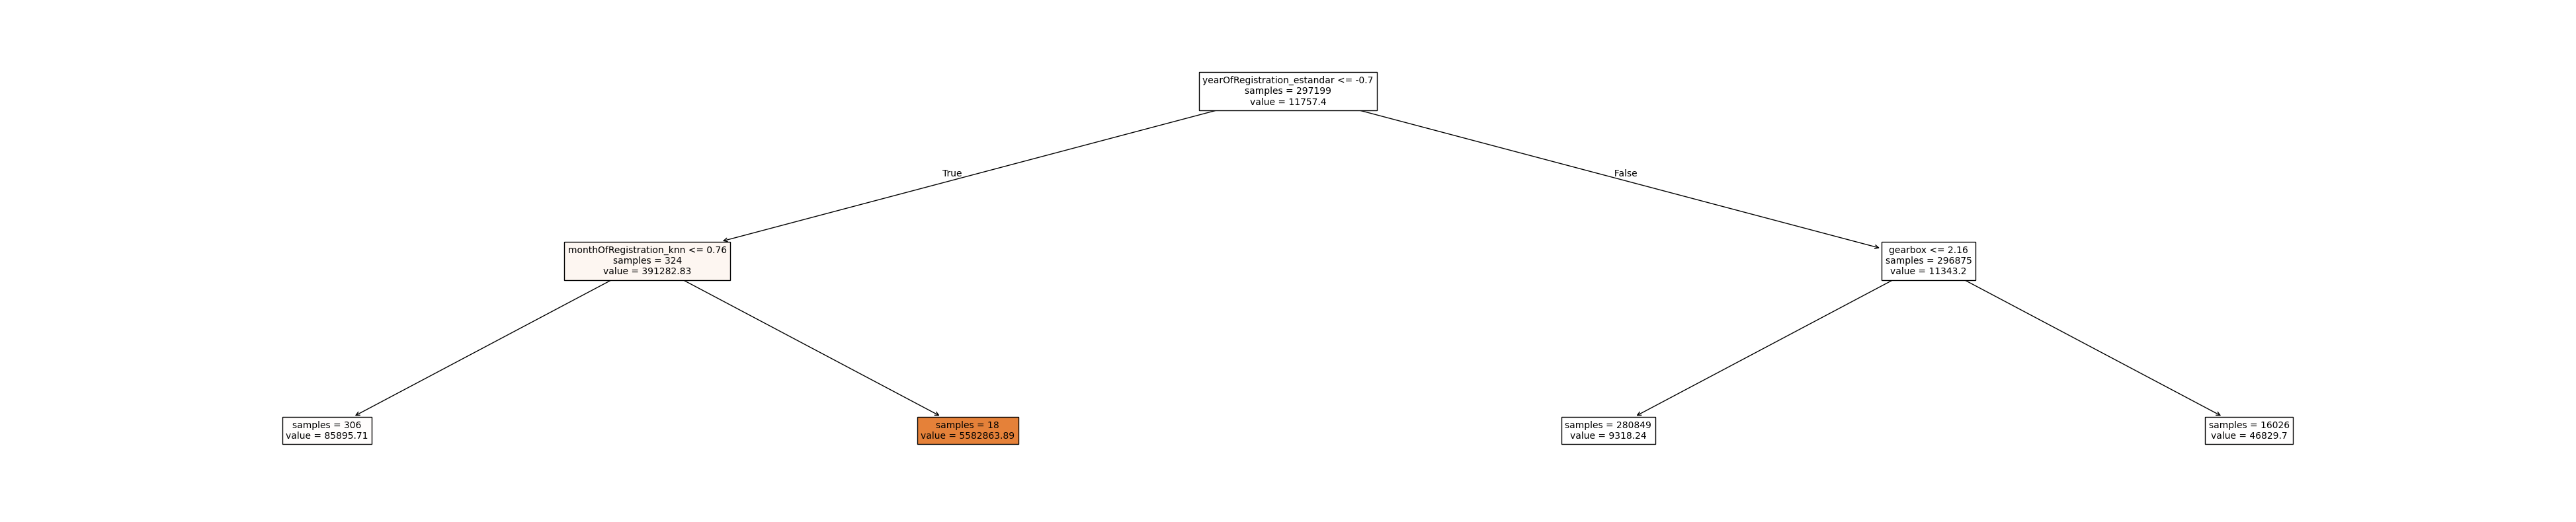

In [30]:
# Estructura del árbol creado
# ------------------------------------------------------------------------------

print(f"Profundidad del árbol: {modelo_final_arbol.get_depth()}")
print(f"Número de nodos terminales: {modelo_final_arbol.get_n_leaves()}")
plt.figure(figsize = (50, 10))
plot = plot_tree(
            decision_tree = modelo_final_arbol,
            feature_names = df.drop(columns = "price_knn").columns,
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2
       )

In [31]:
y_pred_test_arbol = modelo_final_arbol.predict(X_test)
y_pred_train_arbol = modelo_final_arbol.predict(X_train)

def sacar_metricas(y_train, y_test, y_pred_train, y_pred_test):
    metricas = {
        'train': {
            'r2': r2_score(y_train, y_pred_train),
            'MAE': mean_absolute_error(y_train, y_pred_train),
            'MSE': mean_squared_error(y_train, y_pred_train),
            'RMSE': np.sqrt(mean_squared_error(y_train, y_pred_train))
        },
        'test': {
            'r2': r2_score(y_test, y_pred_test),
            'MAE': mean_absolute_error(y_test, y_pred_test),
            'MSE': mean_squared_error(y_test, y_pred_test),
            'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_test))

        }
    }


    return  pd.DataFrame(metricas).T

resultados_arbol = sacar_metricas(y_train, y_test, y_pred_train_arbol, y_pred_test_arbol)
resultados_arbol


,r2,MAE,MSE,RMSE
train,0.00,"15,320.42","512,843,913,102.98","716,131.21"
test,-0.24,"10,013.39","9,136,859,014.09","95,586.92"


Index(['param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf',
       'param_max_leaf_nodes'],
      dtype='object')
Mejor modelo encontrado:
DecisionTreeRegressor(max_depth=3, max_leaf_nodes=4, min_samples_leaf=10,
                      min_samples_split=10, random_state=42)


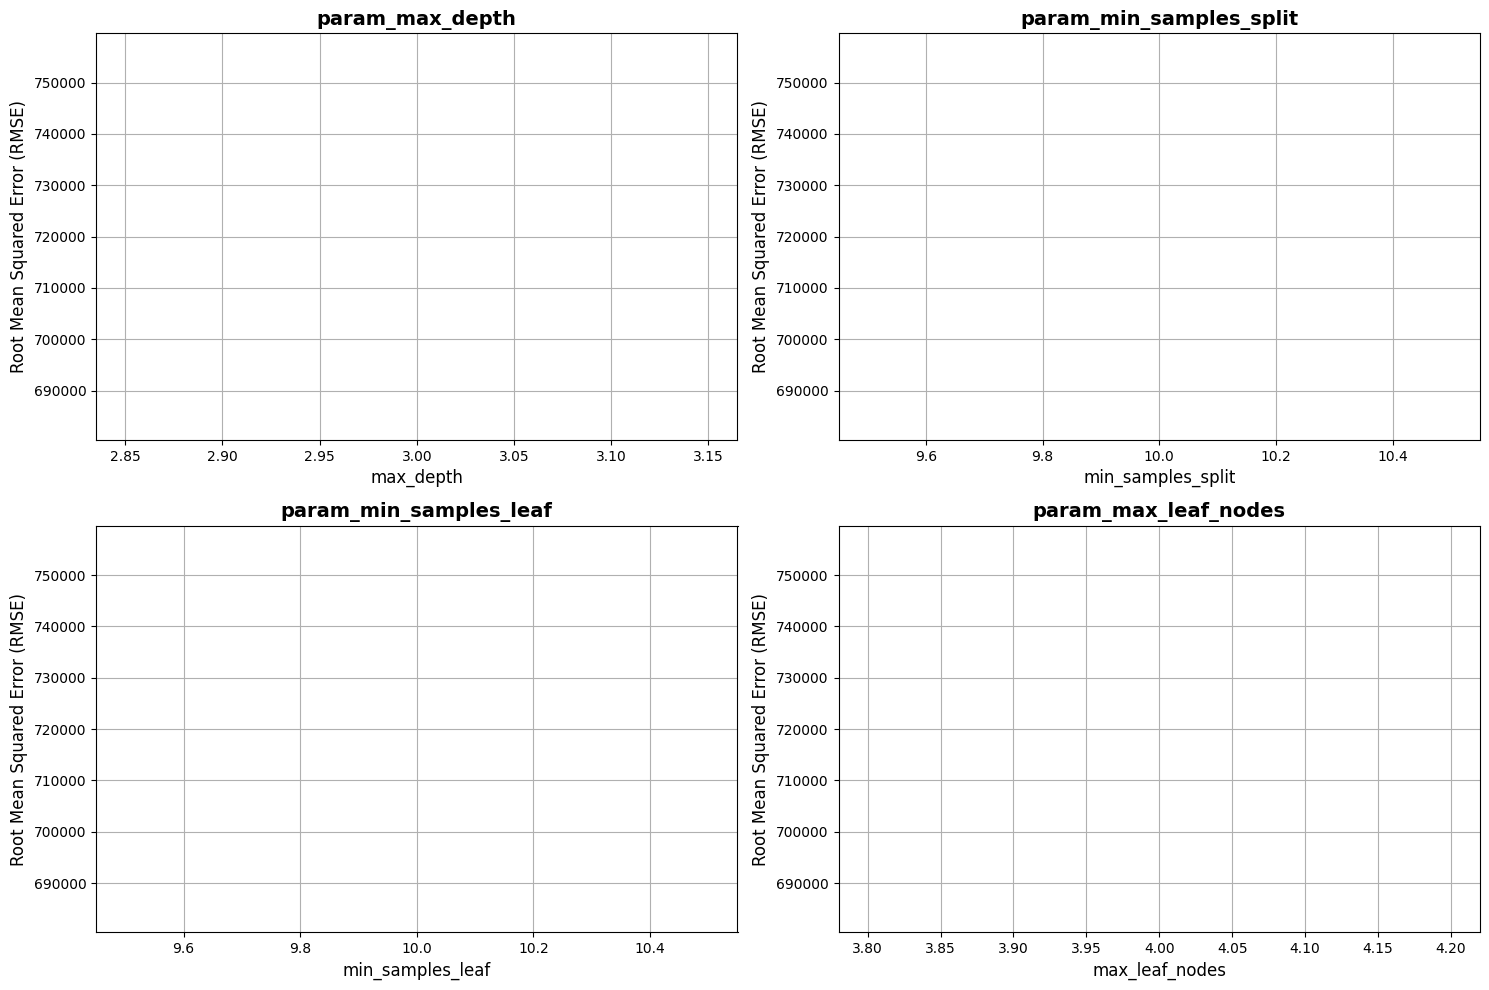

In [32]:
# Modelo de árbol de decisión
modelo_arbol = DecisionTreeRegressor(random_state=42)

# Optimización con GridSearchCV
grid_search = GridSearchCV(modelo_arbol, 
                           params_arbol, 
                           cv=5, 
                           n_jobs = -1,
                           scoring="neg_mean_squared_error")

grid_search.fit(X_train, y_train)

# Mejor modelo obtenido
modelo_final_arbol = grid_search.best_estimator_

# Resultados del GridSearchCV
resultados = pd.DataFrame(grid_search.cv_results_)

# Extraer el impacto de cada parámetro principal
impacto = resultados[['param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf',
                       'param_max_leaf_nodes', 'mean_test_score']]
impacto['mean_test_score'] = -impacto['mean_test_score']  # Convertir a MSE positivo

# Visualización del impacto de cada parámetro
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flat
parametros = impacto.columns[:-1]
print(parametros)
titulos = ['Impacto de max_depth', 'Impacto de min_samples_split',
           'Impacto de min_samples_leaf', 'Impacto de max_leaf_nodes']

for indice, columns in enumerate(parametros):
    df_resultados = impacto.groupby(columns)['mean_test_score'].mean().reset_index()
    df_resultados['sqrt_mean_test_score'] = np.sqrt(df_resultados['mean_test_score'])
    sns.lineplot(x = columns, y = "sqrt_mean_test_score", data = df_resultados, ax = axs[indice])
    axs[indice].set_title(columns, fontsize=14, fontweight='bold')
    axs[indice].set_xlabel(columns.replace('param_', ''), fontsize=12)
    axs[indice].set_ylabel('Root Mean Squared Error (RMSE)', fontsize=12)
    axs[indice].grid(True)

plt.tight_layout()


# Imprimir el mejor modelo
print("Mejor modelo encontrado:")
print(modelo_final_arbol)

#

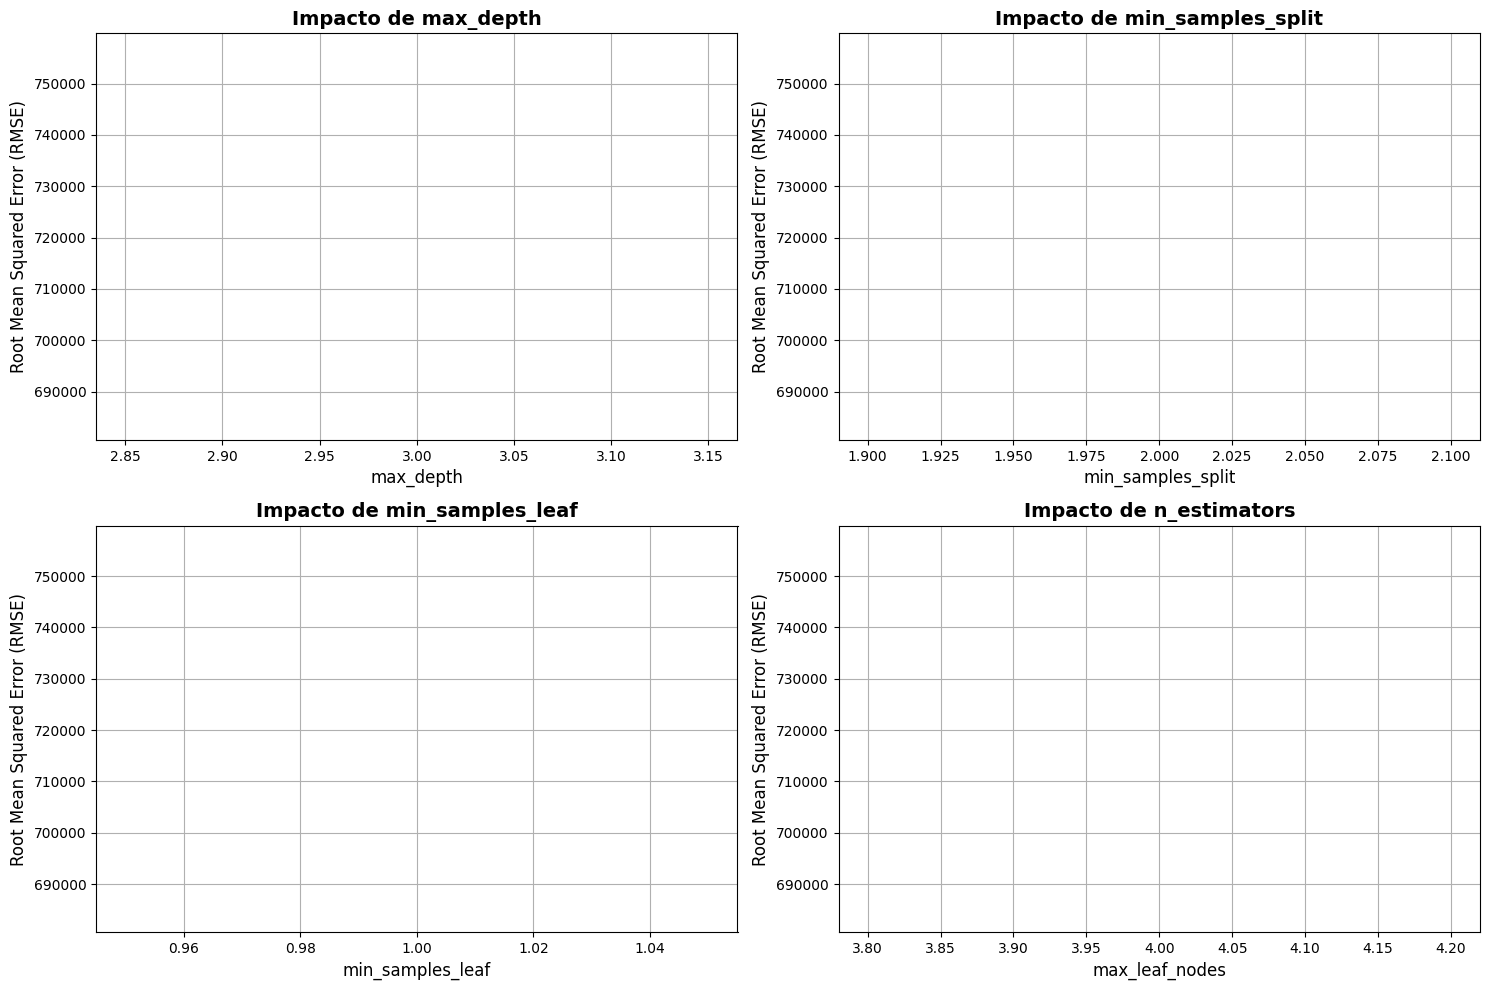

Mejor modelo encontrado para Random Forest:
RandomForestRegressor(max_depth=3, max_leaf_nodes=4, n_estimators=50,
                      random_state=42)


In [34]:
# Modelo de Random Forest
modelo_rf = RandomForestRegressor(random_state=42)

# Definimos un espacio de parámetros para optimizar
params_rf = {
    'n_estimators': [50],
    'max_depth': [3],
    'min_samples_split': [2],
    'min_samples_leaf': [1], 
    'max_leaf_nodes': [4]
}


# Optimización con RandomizedSearchCV
random_search_rf = GridSearchCV(modelo_rf, 
                                params_rf, 
                                cv=3, 
                                scoring="neg_mean_squared_error", 
                                n_jobs=-1)  # Paralelizar

random_search_rf.fit(X_train, y_train.to_numpy().ravel())

# Mejor modelo obtenido
modelo_final_rf = random_search_rf.best_estimator_

# Resultados del RandomizedSearchCV
resultados_rf = pd.DataFrame(random_search_rf.cv_results_)

# Extraer el impacto de cada parámetro principal
impacto_rf = resultados_rf[['param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf','param_max_leaf_nodes', 'mean_test_score']]
impacto_rf['mean_test_score'] = -impacto_rf['mean_test_score']  # Convertir a MSE positivo

# Visualización del impacto de cada parámetro
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flat
parametros_rf = impacto_rf.columns[:-1]
titulos_rf = ['Impacto de max_depth', 'Impacto de min_samples_split',
              'Impacto de min_samples_leaf', 'Impacto de n_estimators']

for indice, columns in enumerate(parametros_rf):
    df_resultados_rf = impacto_rf.groupby(columns)['mean_test_score'].mean().reset_index()
    df_resultados_rf['sqrt_mean_test_score'] = np.sqrt(df_resultados_rf['mean_test_score'])
    sns.lineplot(x=columns, y="sqrt_mean_test_score", data=df_resultados_rf, ax=axs[indice])
    axs[indice].set_title(titulos_rf[indice], fontsize=14, fontweight='bold')
    axs[indice].set_xlabel(columns.replace('param_', ''), fontsize=12)
    axs[indice].set_ylabel('Root Mean Squared Error (RMSE)', fontsize=12)
    axs[indice].grid(True)

plt.tight_layout()
plt.show()

# Imprimir el mejor modelo
print("Mejor modelo encontrado para Random Forest:")
print(modelo_final_rf)

In [35]:
y_pred_test_bosque = modelo_final_rf.predict(X_test)
y_pred_train_bosque = modelo_final_rf.predict(X_train)

resultados_bosque= sacar_metricas(y_train, y_test, y_pred_train_arbol, y_pred_test_arbol)
resultados_bosque

,r2,MAE,MSE,RMSE
train,0.00,"15,320.42","512,843,913,102.98","716,131.21"
test,-0.24,"10,013.39","9,136,859,014.09","95,586.92"


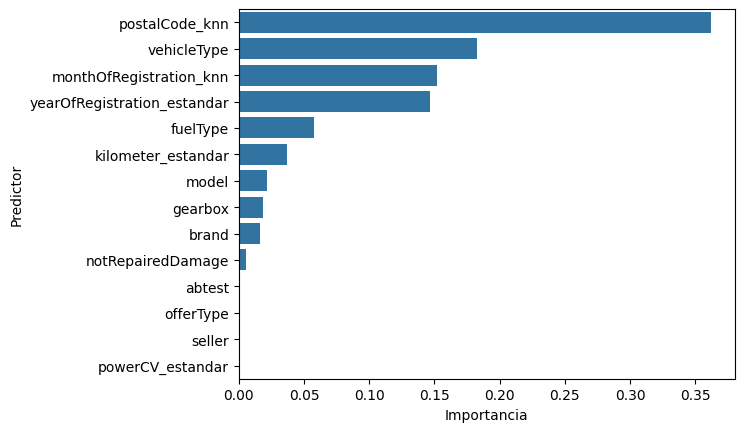

In [36]:
importancias = modelo_final_rf.feature_importances_
importancia_rf = pd.DataFrame({"Predictor": X_train.columns, "Importancia": importancias})
importancia_rf = importancia_rf.sort_values(by="Importancia", ascending=False)
sns.barplot(y = "Predictor", x = "Importancia", data = importancia_rf);

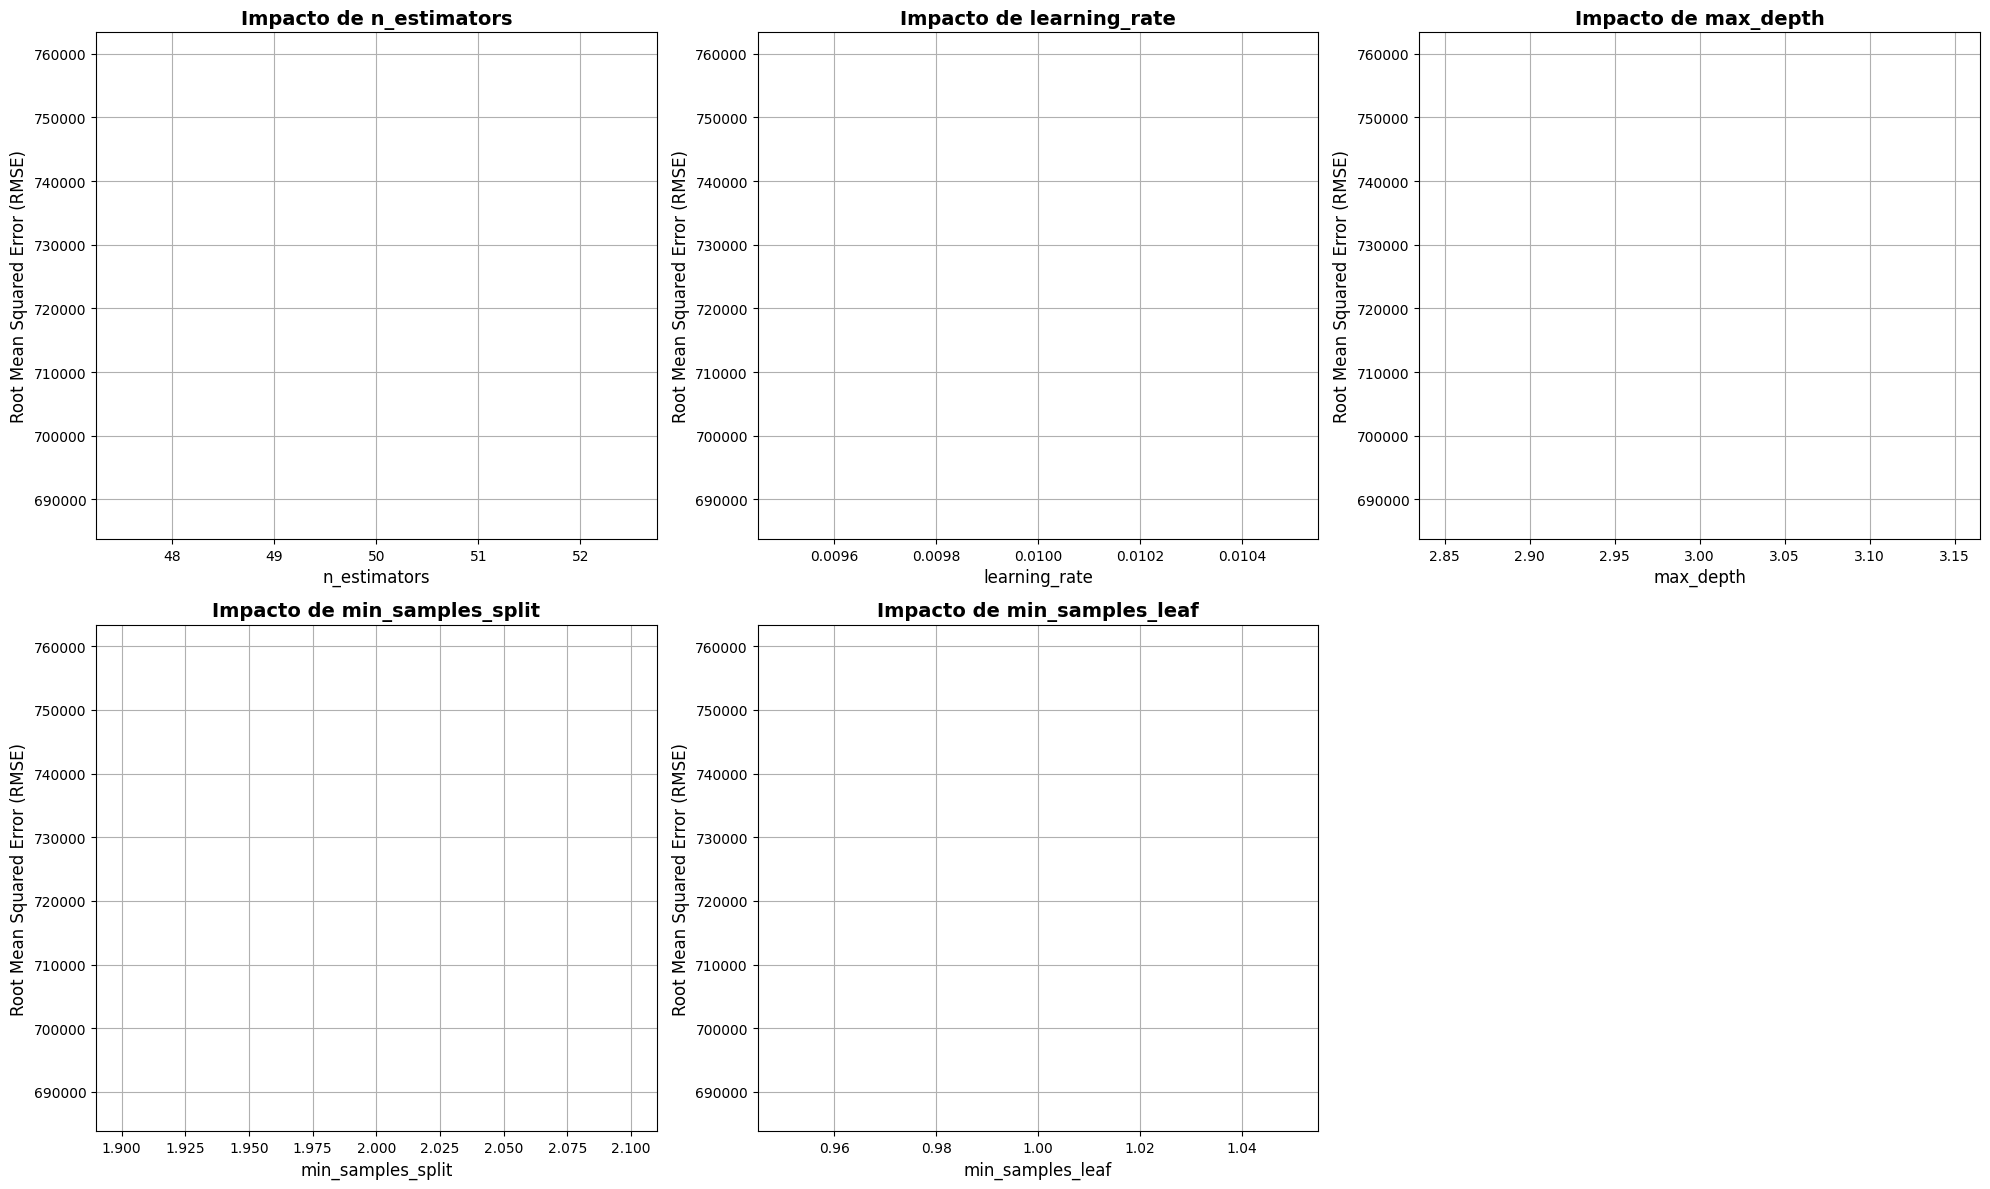

Mejor modelo encontrado para Gradient Boosting:
GradientBoostingRegressor(learning_rate=0.01, n_estimators=50, random_state=42)


In [37]:

# Modelo de Gradient Boosting
modelo_gb = GradientBoostingRegressor(random_state=42)

# Definimos un espacio de parámetros para optimizar
params_gb = {
    'n_estimators': [50],
    'learning_rate': [0.01],
    'max_depth': [3],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

# Optimización con GridSearchCV
random_search_gb = GridSearchCV(modelo_gb, 
                                params_gb, 
                                cv=3, 
                                scoring="neg_mean_squared_error", 
                                n_jobs=-1)

random_search_gb.fit(X_train, y_train.to_numpy().ravel())

# Mejor modelo obtenido
modelo_final_gb = random_search_gb.best_estimator_

# Resultados del GridSearchCV
resultados_gb = pd.DataFrame(random_search_gb.cv_results_)

# Extraer el impacto de cada parámetro principal
impacto_gb = resultados_gb[['param_n_estimators', 'param_learning_rate', 
                            'param_max_depth', 'param_min_samples_split', 
                            'param_min_samples_leaf', 'mean_test_score']]
impacto_gb['mean_test_score'] = -impacto_gb['mean_test_score']  # Convertir a MSE positivo

# Visualización del impacto de cada parámetro
fig, axs = plt.subplots(2, 3, figsize=(20, 12))
axs = axs.flat
parametros_gb = impacto_gb.columns[:-1]
titulos_gb = ['Impacto de n_estimators', 'Impacto de learning_rate',
              'Impacto de max_depth', 'Impacto de min_samples_split',
              'Impacto de min_samples_leaf']

for indice, columns in enumerate(parametros_gb):
    df_resultados_gb = impacto_gb.groupby(columns)['mean_test_score'].mean().reset_index()
    df_resultados_gb['sqrt_mean_test_score'] = np.sqrt(df_resultados_gb['mean_test_score'])
    sns.lineplot(x=columns, y="sqrt_mean_test_score", data=df_resultados_gb, ax=axs[indice])
    axs[indice].set_title(titulos_gb[indice], fontsize=14, fontweight='bold')
    axs[indice].set_xlabel(columns.replace('param_', ''), fontsize=12)
    axs[indice].set_ylabel('Root Mean Squared Error (RMSE)', fontsize=12)
    axs[indice].grid(True)

fig.delaxes(axs[-1])
plt.tight_layout()
plt.show()

# Imprimir el mejor modelo
print("Mejor modelo encontrado para Gradient Boosting:")
print(modelo_final_gb)

In [38]:
y_pred_test_gb = modelo_final_gb.predict(X_test)
y_pred_train_gb = modelo_final_gb.predict(X_train)

resultados_gb= sacar_metricas(y_train, y_test, y_pred_train_gb, y_pred_test_gb)
resultados_gb

,r2,MAE,MSE,RMSE
train,0.04,"14,205.66","493,106,981,189.85","702,215.77"
test,-0.74,"9,322.51","12,819,790,938.05","113,224.52"


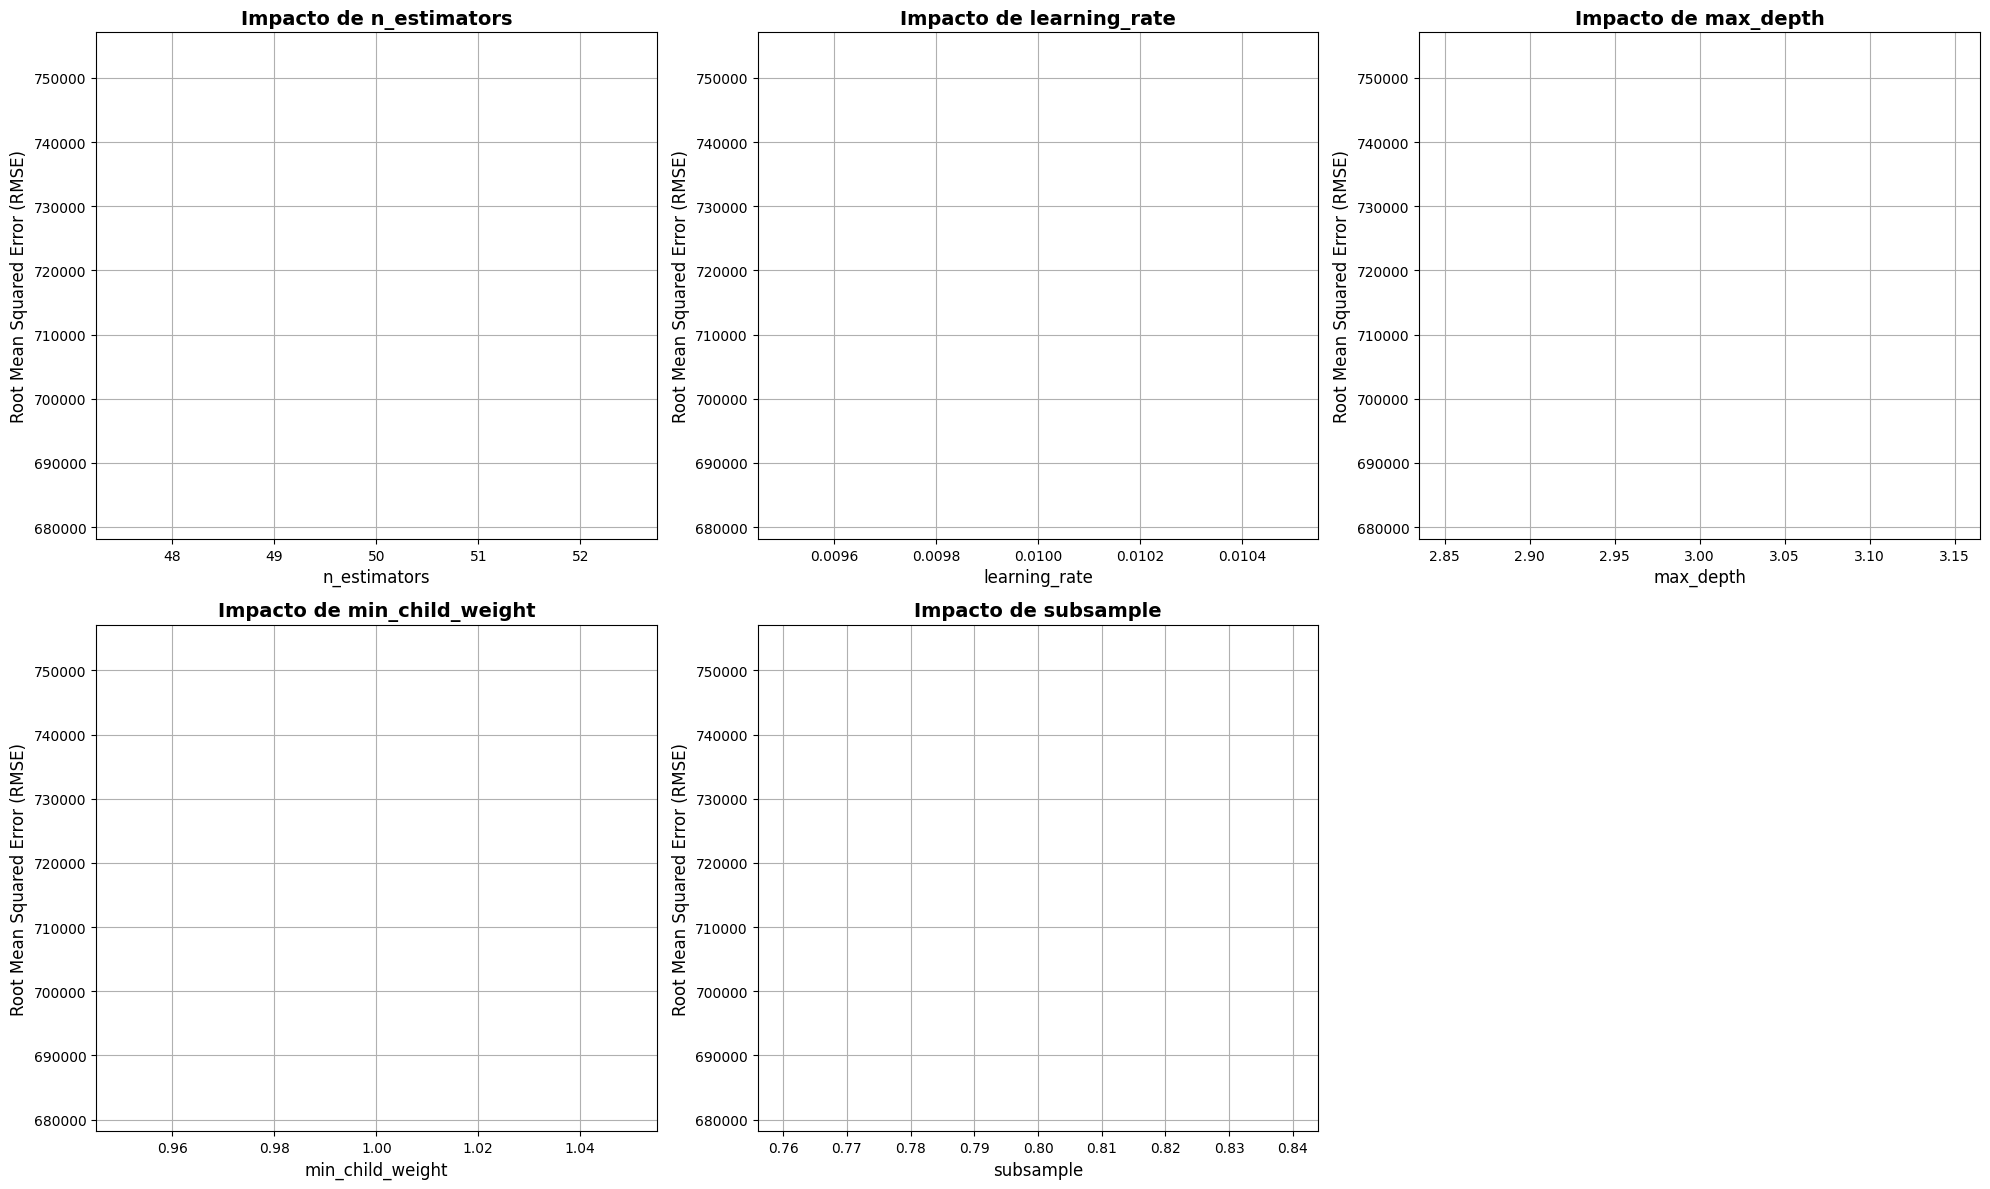

In [40]:
from xgboost import XGBRegressor

# Modelo de XGBoost
modelo_xgb = XGBRegressor(random_state=42,  eval_metric='rmse')

# Definimos un espacio de parámetros para optimizar
params_xgb = {
    'n_estimators': [50],
    'learning_rate': [0.01],
    'max_depth': [3],
    'min_child_weight': [1],  # Equivalente a min_samples_leaf
    'subsample': [0.8],        # Para evitar sobreajuste
    'colsample_bytree': [0.8]  # Selección de columnas al construir cada árbol
}

# Optimización con GridSearchCV
random_search_xgb = GridSearchCV(modelo_xgb, 
                                 params_xgb, 
                                 cv=3, 
                                 scoring="neg_mean_squared_error", 
                                 n_jobs=-1)

random_search_xgb.fit(X_train, y_train.to_numpy().ravel())

# Mejor modelo obtenido
modelo_final_xgb = random_search_xgb.best_estimator_

# Resultados del GridSearchCV
resultados_xgb = pd.DataFrame(random_search_xgb.cv_results_)

# Extraer el impacto de cada parámetro principal
impacto_xgb = resultados_xgb[['param_n_estimators', 'param_learning_rate', 
                              'param_max_depth', 'param_min_child_weight', 
                              'param_subsample', 'param_colsample_bytree', 
                              'mean_test_score']]
impacto_xgb['mean_test_score'] = -impacto_xgb['mean_test_score']  # Convertir a MSE positivo

# Visualización del impacto de cada parámetro
fig, axs = plt.subplots(2, 3, figsize=(20, 12))
axs = axs.flat
parametros_xgb = impacto_xgb.columns[:-1]
titulos_xgb = ['Impacto de n_estimators', 'Impacto de learning_rate',
               'Impacto de max_depth', 'Impacto de min_child_weight',
               'Impacto de subsample', 'Impacto de colsample_bytree']

for indice, columns in enumerate(parametros_xgb):
    df_resultados_xgb = impacto_xgb.groupby(columns)['mean_test_score'].mean().reset_index()
    df_resultados_xgb['sqrt_mean_test_score'] = np.sqrt(df_resultados_xgb['mean_test_score'])
    sns.lineplot(x=columns, y="sqrt_mean_test_score", data=df_resultados_xgb, ax=axs[indice])
    axs[indice].set_title(titulos_xgb[indice], fontsize=14, fontweight='bold')
    axs[indice].set_xlabel(columns.replace('param_', ''), fontsize=12)
    axs[indice].set_ylabel('Root Mean Squared Error (RMSE)', fontsize=12)
    axs[indice].grid(True)

fig.delaxes(axs[-1])
plt.tight_layout()
plt.show()


In [41]:
y_pred_test_xg = modelo_final_xgb.predict(X_test)
y_pred_train_xg = modelo_final_xgb.predict(X_train)

resultados_xg= sacar_metricas(y_train, y_test, y_pred_train_xg, y_pred_test_xg)
resultados_xg

,r2,MAE,MSE,RMSE
train,0.02,"14,448.81","506,095,766,164.42","711,404.08"
test,-0.04,"9,365.55","7,642,862,175.56","87,423.46"
